In [304]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import math

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
from sklearn import datasets
from sklearn.preprocessing import scale

# synthetic datasets

In [159]:
def make_alternate_stripes():

    data = []

    for i in [np.pi * i for i in [-3, -1, 1, 3, 5]]:
        noise = np.random.randn(200, 1)*0.1
        x = np.expand_dims(np.repeat(i, 200), axis=1) + noise
        y = noise

        concat = np.concatenate((x, y), axis=1)
        data.append(concat)

    for i in [np.pi * i for i in [-4, -2, 0, 2, 4]]:
        noise = np.random.randn(200, 1)*0.1
        x = np.expand_dims(np.repeat(i, 200), axis=1) + noise
        y = noise

        concat = np.concatenate((x, y), axis=1)
        data.append(concat)

    data_x = np.reshape(np.array(data), (2000, 2))

    return data_x


def fibonacci_sphere(r, samples=1000, mu=0, sigma=0.05):
    points = []
    phi = math.pi * (3. - math.sqrt(5.))  # golden angle in radians

    for i in range(samples):
        y = 1 - (i / float(samples - 1)) * 2  # y goes from 1 to -1
        radius = math.sqrt(1 - y * y)  # radius at y

        theta = phi * i  # golden angle increment

        x = math.cos(theta) * radius
        z = math.sin(theta) * radius

        points.append((x, y, z))

        noise = np.random.randn(1000, 3)
        noise = noise * sigma + mu

    return np.array(points) * r + noise


def make_two_spheres():
    sphere_one = fibonacci_sphere(0.1)
    sphere_two = fibonacci_sphere(0.5)

    x = np.concatenate((sphere_one, sphere_two), axis=0)

    return x


def circles_data(x0=0, y0=0):
    np.random.seed(0)
    x, y = datasets.make_circles(n_samples=2000, factor=0.1, noise=0.05)
    x[:, 0] += x0
    x[:, 1] += y0

    return x

In [160]:
def load_data(dataset):
    
    if dataset == "spheres":
        data_x = make_two_spheres()

    elif dataset == "circles":
        data_x = circles_data()

    elif dataset == "alternate_stripes":
        data_x = make_alternate_stripes()

    return data_x


# load original data and plot it

In [335]:
dataset = "alternate_stripes"

In [336]:
x = load_data(dataset)

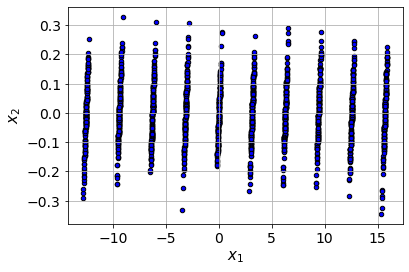

In [337]:
# Plot results

plt.figure()
plt.grid(True)

plt.scatter(x[:, 0], x[:, 1], c="blue", s=20, edgecolor="k")
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("$x_1$", size=15)
plt.ylabel("$x_2$", size=15)
# plt.savefig(f'original_{dataset}.pdf', dpi=600, bbox_inches='tight')
plt.show()

# Kernel PCA and plot the principal components

In [338]:
kernel_list = ["rbf", "cosine", "poly", "sigmoid"]

In [339]:
n_components = x.shape[1]

In [340]:
x = scale(x, axis=0)

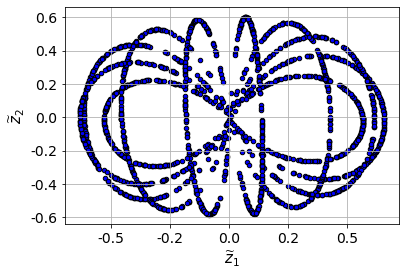

[0.56831395 0.43168605]


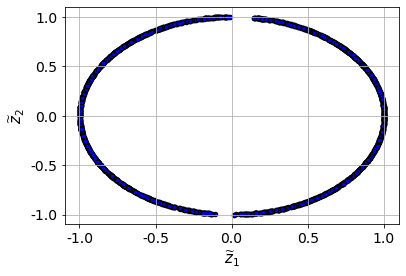

[0.54546245 0.45453755]


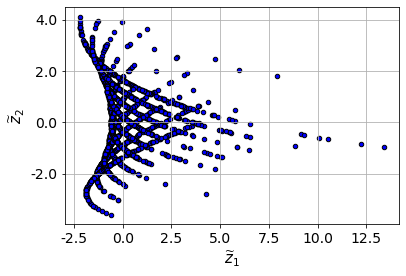

[0.52505668 0.47494332]


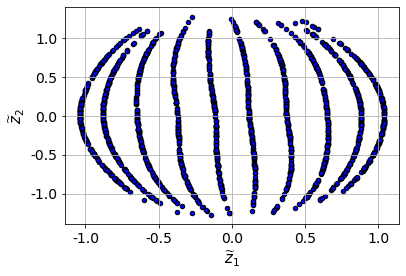

[0.5356943 0.4643057]


In [343]:
for ke in kernel_list:
    kernel_pca = KernelPCA(n_components=n_components, kernel=ke, gamma=1, alpha=0.1, degree=2)
    X_kpca = kernel_pca.fit(x).transform(x)
    
    # Plot results
    # plt.figure()
    fig, ax = plt.subplots()
    ax.grid(True)

    ax.scatter(X_kpca[:, 0], X_kpca[:, 1], c="blue", s=20, edgecolor="k")
    low_y_lim, high_y_lim = plt.gca().get_ylim()
    low_x_lim, high_x_lim = plt.gca().get_xlim()
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.tick_params(axis='both', which='major', labelsize=14)
#     ax.set_xticklabels(size=14)
#     ax.set_yticklabels(size=14)
    ax.set_xlabel(r"$\widetilde{z}_1$", size=15)
    ax.set_ylabel(r"$\widetilde{z}_2$", size=15)
    plt.savefig(f'original_{dataset}_{ke}.pdf', dpi=300, bbox_inches='tight')
    plt.show()
    print(kernel_pca.eigenvalues_/np.sum(kernel_pca.eigenvalues_))